# Condensed Version of DL Notes

- What is a neural network?
- How do they work (generally)
- How to choose between dog and cat
    - describe convolutions and nodes for
- demonstrate

powerpoint: 

In [1]:
import os
os.getcwd()

'/Users/tyler.welsh/projects/kaggle_training/5_deep_learning'

In [2]:
%reload_ext autoreload
%autoreload 2
from my_modules import dl_helpers as helpers
from termcolor import cprint # colored prints

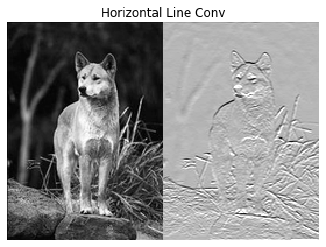

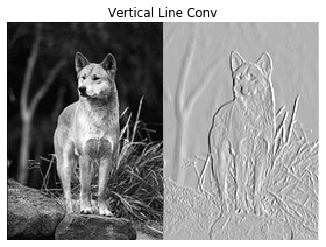

In [3]:
horizontal_line_conv = [[ 1, 1],
                        [-1,-1]]
vert_line_conv = [[1, -1],
                  [1, -1]]

# load_my_image and visualize_conv are utility functions taken from the Kaggle/learntools repository
original_image = helpers.load_my_image('dog_1')
helpers.visualize_conv(original_image, horizontal_line_conv, 'Horizontal Line Conv')
helpers.visualize_conv(original_image, vert_line_conv, 'Vertical Line Conv')

In [3]:
# Choose images to work with for our example
from os.path import join

# sample images
image_dir = '../images/dogs/train/'
img_dict = {'dog_1' : "00a338a92e4e7bf543340dc849230e75.jpg",
            'dog_2' : "0b345d4f2434903c374ad8b8513a289b.jpg",
            'dog_3' : "0db44ddb42bf1f97de987abe2bf01839.jpg",
            'dog_4' : "01f8540fb1084107a6eb3e528f82c1aa.jpg"}

img_paths = [join(image_dir, file) for file in img_dict.values()]

import numpy as np
from tensorflow.python.keras.applications.resnet import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
image_size = 224

# read and prep
def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return output

from tensorflow.keras.applications import ResNet50

# pretrained model
my_model = ResNet50(weights='../pre-trained/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')

In [4]:
test_data = read_and_prep_images(img_paths)


In [5]:
preds = my_model.predict(test_data)

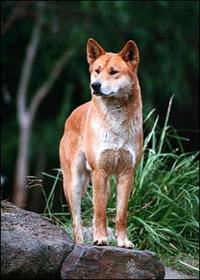

Most Likely Label: 1
[('n02115641', 'dingo', 0.96725947), ('n02115913', 'dhole', 0.022728983), ('n02129165', 'lion', 0.0030908594)]


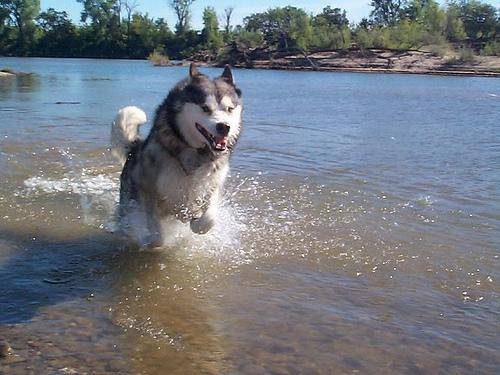

Most Likely Label: 2
[('n02110185', 'Siberian_husky', 0.6226635), ('n02110063', 'malamute', 0.29406705), ('n02109961', 'Eskimo_dog', 0.08312693)]


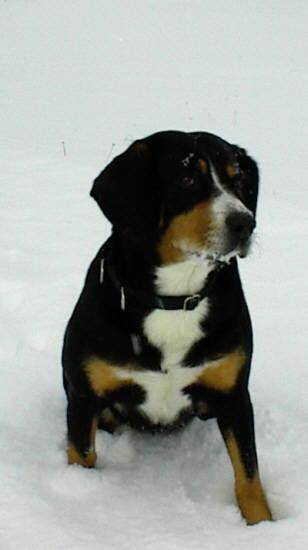

Most Likely Label: 3
[('n02108000', 'EntleBucher', 0.9231567), ('n02107908', 'Appenzeller', 0.066975676), ('n02107574', 'Greater_Swiss_Mountain_dog', 0.008360809)]


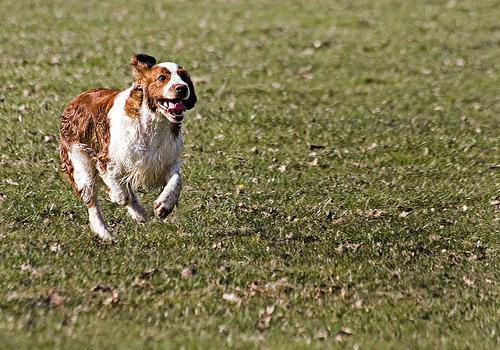

Most Likely Label: 4
[('n02091134', 'whippet', 0.59801704), ('n02091244', 'Ibizan_hound', 0.10139492), ('n02101388', 'Brittany_spaniel', 0.08858551)]


In [6]:
from my_modules.dl_helpers import decode_predictions
from IPython.display import Image, display

# predictions
most_likely_labels = decode_predictions(preds, top=3)
for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    cprint(f'Most Likely Label: {i + 1}', 'green')
    print(most_likely_labels[i])

In [9]:
testing_dir = '../images/dogs/test/'
extra_test_images = {'shiba' : "shiba.jpg"}

test_paths = [join(testing_dir, file) for file in extra_test_images.values()]
new_test_data = read_and_prep_images(test_paths)
new_test_preds = my_model.predict(new_test_data, verbose=1)

1/1 [==============================] - 0s 201ms/sample


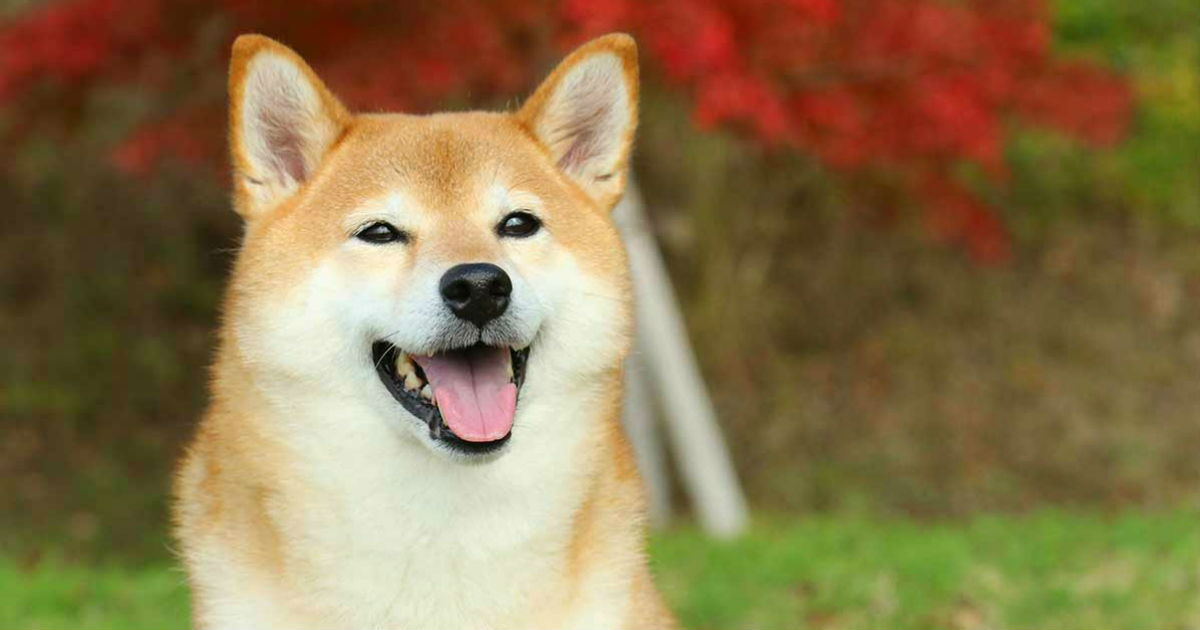

Most Likely Label: 1
[('n02115641', 'dingo', 0.5294904), ('n02106662', 'German_shepherd', 0.15543905), ('n02109961', 'Eskimo_dog', 0.11093186)]


In [10]:
labels = decode_predictions(new_test_preds, top=3)
for i, img_path in enumerate(test_paths):
    display(Image(img_path))
    cprint(f'Most Likely Label: {i + 1}', 'green')
    print(labels[i])